In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.process.lsf import COSLSF
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
import numpy as np
from spectacle.analysis.metrics import correlate, npcorrelate, cross_correlate, autocorrelate
from astropy.table import Table
import uncertainties.unumpy as unp
import corner

In [2]:
%matplotlib notebook

In [3]:
tab = Table.read("/Users/nearl/projects/spectacle/output_para_space.ecsv", format='ascii')

# columns = []

# for col_name in tab.colnames:
#     col = tab[col_name].reshape(tab[col_name].size // len(tab.colnames), len(tab.colnames))
#     columns.append(col)

    
# data = np.vstack(columns)

# corner.corner(data)

In [9]:
from matplotlib.colors import LogNorm
plt.hist2d(tab['lambda_0'], tab['column_density'], bins=100, norm=LogNorm())
plt.colorbar()

<IPython.core.display.Javascript object>


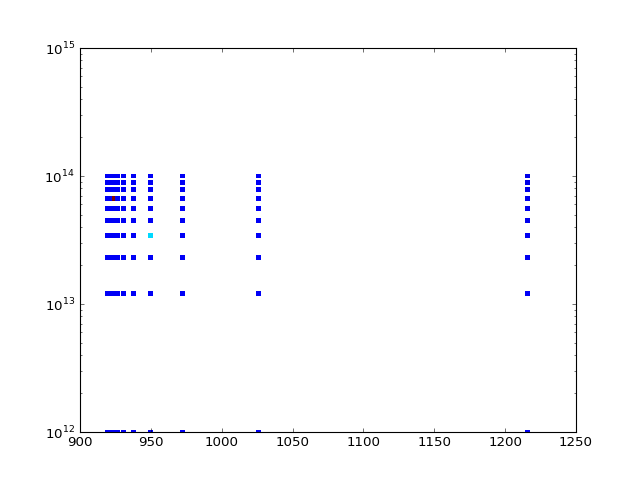

In [10]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tab['lambda_0'], tab['column_density'], s=20, 
           c=tab['correlate'], marker = 's', cmap = cm.jet, linewidth='0');
ax.set_yscale('log')

In [11]:
corr_mat = np.array(zip(tab['lambda_0'], tab['column_density'], tab['correlate']))
print(tab['lambda_0'].shape, tab['column_density'].shape, tab['correlate'].shape)

(1000,) (1000,) (1000,)


In [12]:
para1 = 'lambda_0'
para2 = 'column_density'
para3 = 'v_doppler'


corr = np.zeros((tab[para1].size, tab[para2].size))
x_range = []
y_range = []

for x in range(corr.shape[0]):
    for y in range(corr.shape[1]):
        ind = np.argmax((tab[para1] == tab[para1][x]) & (tab[para2] == tab[para2][y]) & (tab[para3] == tab[para3][0]))
        corr[x][y] = tab['correlate'][ind]
        x_range = tab[para1][ind]
        y_range = tab[para2][ind]

<IPython.core.display.Javascript object>


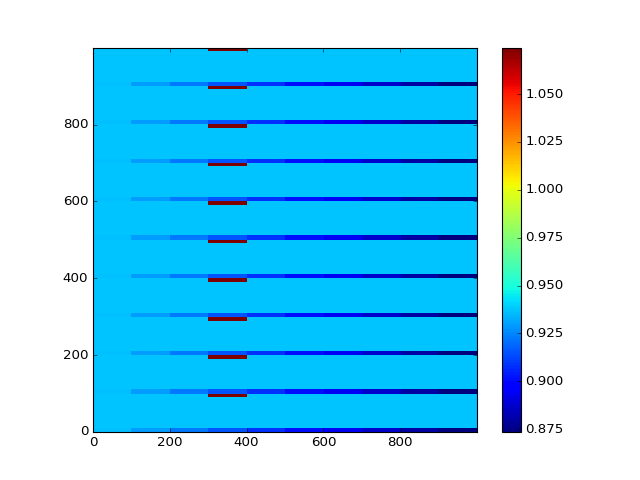

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.imshow(corr, origin='', interpolation='nearest')
ax.grid(which='minor', axis='both', linestyle='-')

cbar = fig.colorbar(cax)

<IPython.core.display.Javascript object>


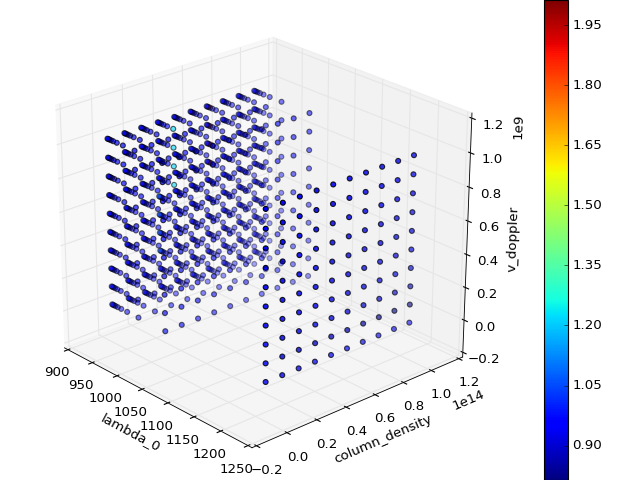

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(tab[para1], tab[para2], tab[para3], c=tab['correlate'])
ax.set_xlabel(tab[para1].name)
ax.set_ylabel(tab[para2].name)
ax.set_zlabel(tab[para3].name)
fig.colorbar(p)
plt.show()